In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.read_csv("titanic_data/train.csv")
test_data = pd.read_csv("titanic_data/test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

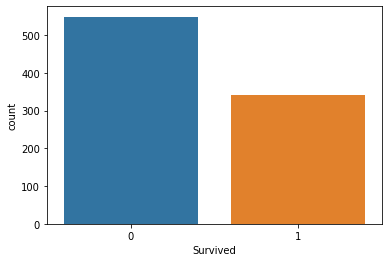

In [5]:
sns.countplot(train_data.Survived)
plt.show()

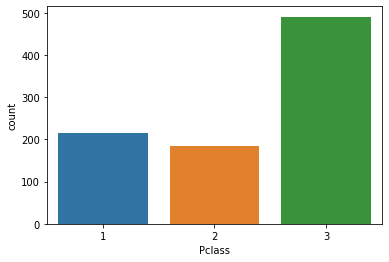

In [6]:
sns.countplot(train_data.Pclass)
plt.show()

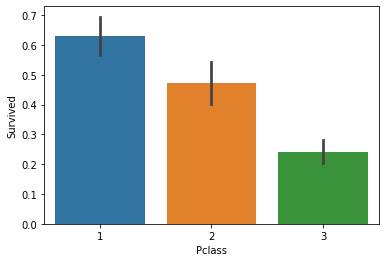

In [7]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()

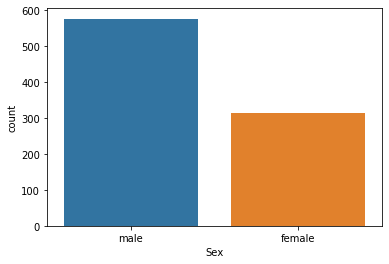

In [8]:
sns.countplot(train_data.Sex)
plt.show()

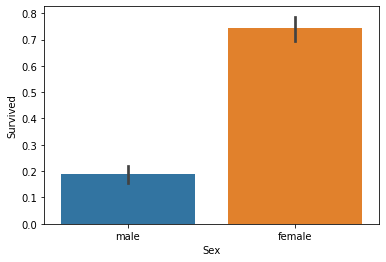

In [9]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.show()

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


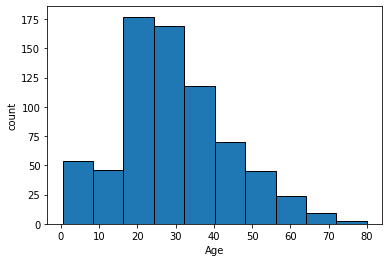

In [10]:
plt.hist(train_data.Age, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

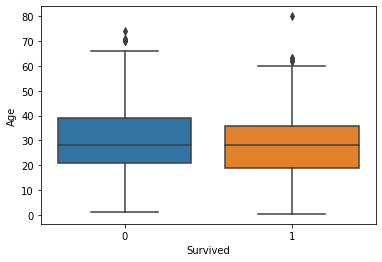

In [11]:
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.show()

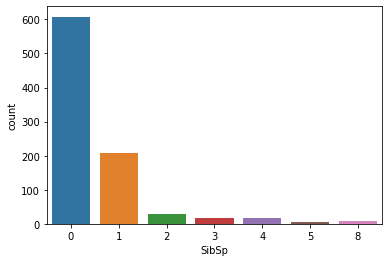

In [12]:
sns.countplot(train_data.SibSp)
plt.show()

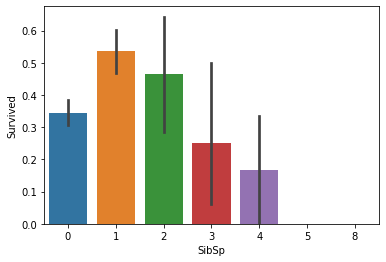

In [13]:
sns.barplot(x='SibSp', y='Survived', data=train_data)
plt.show()

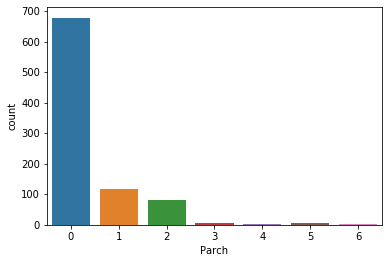

In [14]:
sns.countplot(train_data.Parch)
plt.show()

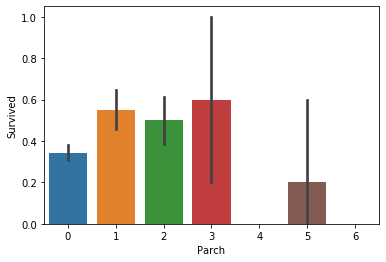

In [15]:
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.show()

In [16]:
data = train_data.append(test_data)
data['Title'] = data.Name.str.extract(r'([A-Za-z]+)\.', expand=False)
data.Title.value_counts()

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Jonkheer      1
Capt          1
Don           1
Sir           1
Countess      1
Dona          1
Mme           1
Lady          1
Name: Title, dtype: int64

In [17]:
Common_Title = ['Mr', 'Miss', 'Mrs', 'Master']
data['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
data['Title'].replace(['Lady'], 'Mrs', inplace=True)
data['Title'].replace(['Sir', 'Rev'], 'Mr', inplace=True)
data['Title'][~data.Title.isin(Common_Title)] = 'Others'

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


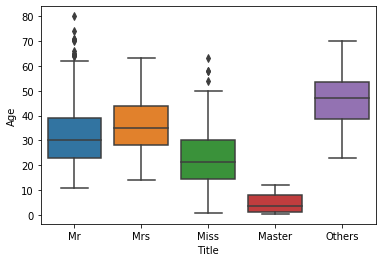

In [18]:
train_data = data[:len(train_data)]
test_data = data[len(train_data):]
sns.boxplot(x='Title', y='Age', data=train_data)
plt.show()

In [19]:
AgeMedian_by_titles = train_data.groupby('Title')['Age'].median()
AgeMedian_by_titles

Title
Master     3.5
Miss      21.5
Mr        30.0
Mrs       35.0
Others    47.0
Name: Age, dtype: float64

In [20]:
for title in AgeMedian_by_titles.index:
    train_data['Age'][(train_data.Age.isnull()) & (train_data.Title == title)] = AgeMedian_by_titles[title]
    test_data['Age'][(test_data.Age.isnull()) & (test_data.Title == title)] = AgeMedian_by_titles[title]

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [21]:
train_data['Embarked'].fillna(train_data.Embarked.mode()[0], inplace=True)

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [22]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [23]:
train_data.Fare.sort_values(ascending=False).head(10)
#train_data.loc[train_data.Fare>512, ‘Fare’] = 263

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
88     263.0000
27     263.0000
311    262.3750
742    262.3750
299    247.5208
Name: Fare, dtype: float64

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            891 non-null float64
Embarked       891 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
Title          891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 130.5+ KB


In [25]:
train_data['Sex_Code'] = train_data['Sex'].map({'female':1, 'male':0}).astype('int')
test_data['Sex_Code'] = test_data['Sex'].map({'female':1, 'male':0}).astype('int')

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
train_data['Embarked_Code'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')
test_data['Embarked_Code'] = test_data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


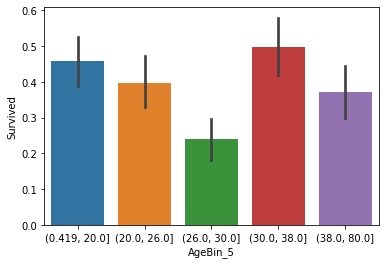

In [27]:
train_data['AgeBin_5'] = pd.qcut(train_data['Age'], 5)
test_data['AgeBin_5'] = pd.qcut(test_data['Age'], 5)
sns.barplot(x='AgeBin_5', y='Survived', data=train_data)
plt.show()

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


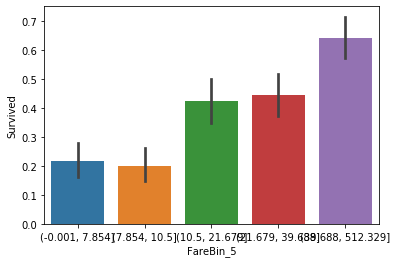

In [28]:
train_data['FareBin_5'] = pd.qcut(train_data['Fare'], 5)
test_data['FareBin_5'] = pd.qcut(test_data['Fare'], 5)
sns.barplot(x='FareBin_5', y='Survived', data=train_data)
plt.show()

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

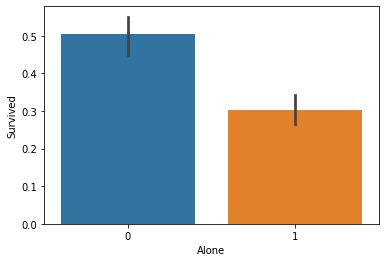

In [29]:
train_data['FamilySize'] = train_data.SibSp + train_data.Parch + 1
test_data['FamilySize'] = test_data.SibSp + test_data.Parch + 1
train_data['Alone'] = train_data.FamilySize.map(lambda x: 1 if x == 1 else 0)
test_data['Alone'] = test_data.FamilySize.map(lambda x: 1 if x == 1 else 0)
sns.barplot(x='Alone', y='Survived', data=train_data)
plt.show()

In [30]:
train_data['Title_Code'] = train_data.Title.map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Others':4}).astype('int')
test_data['Title_Code'] = test_data.Title.map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Others':4}).astype('int')

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
label = LabelEncoder()
train_data['AgeBin_Code_5'] = label.fit_transform(train_data['AgeBin_5'])
test_data['AgeBin_Code_5'] = label.fit_transform(test_data['AgeBin_5'])
label = LabelEncoder()
train_data['FareBin_Code_5'] = label.fit_transform(train_data['FareBin_5'])
test_data['FareBin_Code_5'] = label.fit_transform(test_data['FareBin_5'])

/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/samarthhiremath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [32]:
train_data.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Sex_Code',
       'Embarked_Code', 'AgeBin_5', 'FareBin_5', 'FamilySize', 'Alone',
       'Title_Code', 'AgeBin_Code_5', 'FareBin_Code_5'],
      dtype='object')

In [33]:
X_train = train_data.drop(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'AgeBin_5', 'FareBin_5', 'FamilySize'], axis=1)
Y_train = train_data['Survived']
X_train.columns

Index(['Pclass', 'Sex_Code', 'Embarked_Code', 'Alone', 'Title_Code',
       'AgeBin_Code_5', 'FareBin_Code_5'],
      dtype='object')

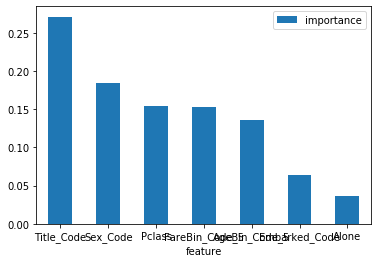

In [34]:
model = RandomForestClassifier(n_estimators=200, random_state=2)
model.fit(X_train,Y_train)
importance = pd.DataFrame({'feature':X_train.columns, 'importance': np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=0)
plt.show()

In [35]:
final = ['Pclass', 'Sex_Code', 'Title_Code', 'FareBin_Code_5']
grid_param = {
'n_estimators': [100, 200, 300],
'criterion':['gini','entropy'],
'min_samples_split': [2, 10, 20],
'min_samples_leaf': [1, 5],
'bootstrap': [True, False],
}
gd_sr = GridSearchCV(estimator=model,
 param_grid=grid_param,
 scoring='accuracy',
 cv=5,
 n_jobs=-1)
gd_sr.fit(X_train[final], Y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 300}


In [36]:
model = RandomForestClassifier(n_estimators=300, bootstrap=True, criterion= 'gini', min_samples_leaf=5, min_samples_split=2, random_state=2)

In [37]:
X_test = test_data[final]
model.fit(X_train[final],Y_train)
prediction = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction.astype(int)})
output.to_csv('titanic_submission1.csv', index=False)